In [8]:
import perfmodel
import os.path
from os import path
import json
import glob
import numpy as np
import pandas as pd
from jsonpath_ng import jsonpath, parse
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

%matplotlib inline
#global defaults of graphics size
plt.rcParams["figure.figsize"] = [50, 50]

#Define run_id
run_id = "2020-10-23-15-59-41"
#point to test result folder containing runs
location = perfmodel.RunResultLocation("../testresults/azure.1-auto-standalone")

runDefinition = perfmodel.RunDefinition(location)
runDefinition.process_run_samples()
run = runDefinition.find_run(run_id)
meta = run.run_meta
df_latencies = pd.DataFrame(data={'run1': run.export_latency_node_distinct_latencies()})
df_ping = pd.DataFrame(run.export_ping_series(perfmodel.c_ping_all_metrics))


## Single Run Analytics

CONFIDENTIAL | NOT FOR DISTRIBUTION | DATA NOT VALIDATED

Cloudprovider: {{meta.cloud_provider}}

Infrastructure: {{meta.infrastructure}}

Run name: {{meta.run_name}}

Run Id: {{meta.run_id}}

Started: {{meta.ts_run_start}}

Ended: {{meta.ts_run_end}}

Duration: {{meta.run_duration_sec()}}


# Latency
## Basic stats

In [9]:
run1_series = df_latencies['run1']
run1_series.describe()

count    400000.000000
mean        240.830457
std          47.201610
min         174.000000
25%         214.000000
50%         229.000000
75%         254.000000
max        2464.000000
Name: run1, dtype: float64

## Quantiles

In [10]:
q1 = run1_series.quantile(q=[0.05,0.1,0.25,0.5,0.75,0.9,0.99,0.995,0.999,0.9999,0.99999])
q1

0.05000     197.0000
0.10000     202.0000
0.25000     214.0000
0.50000     229.0000
0.75000     254.0000
0.90000     280.0000
0.99000     459.0000
0.99500     483.0000
0.99900     516.0000
0.99990     751.0002
0.99999    1469.0000
Name: run1, dtype: float64

## Scatter Plot

<AxesSubplot:>

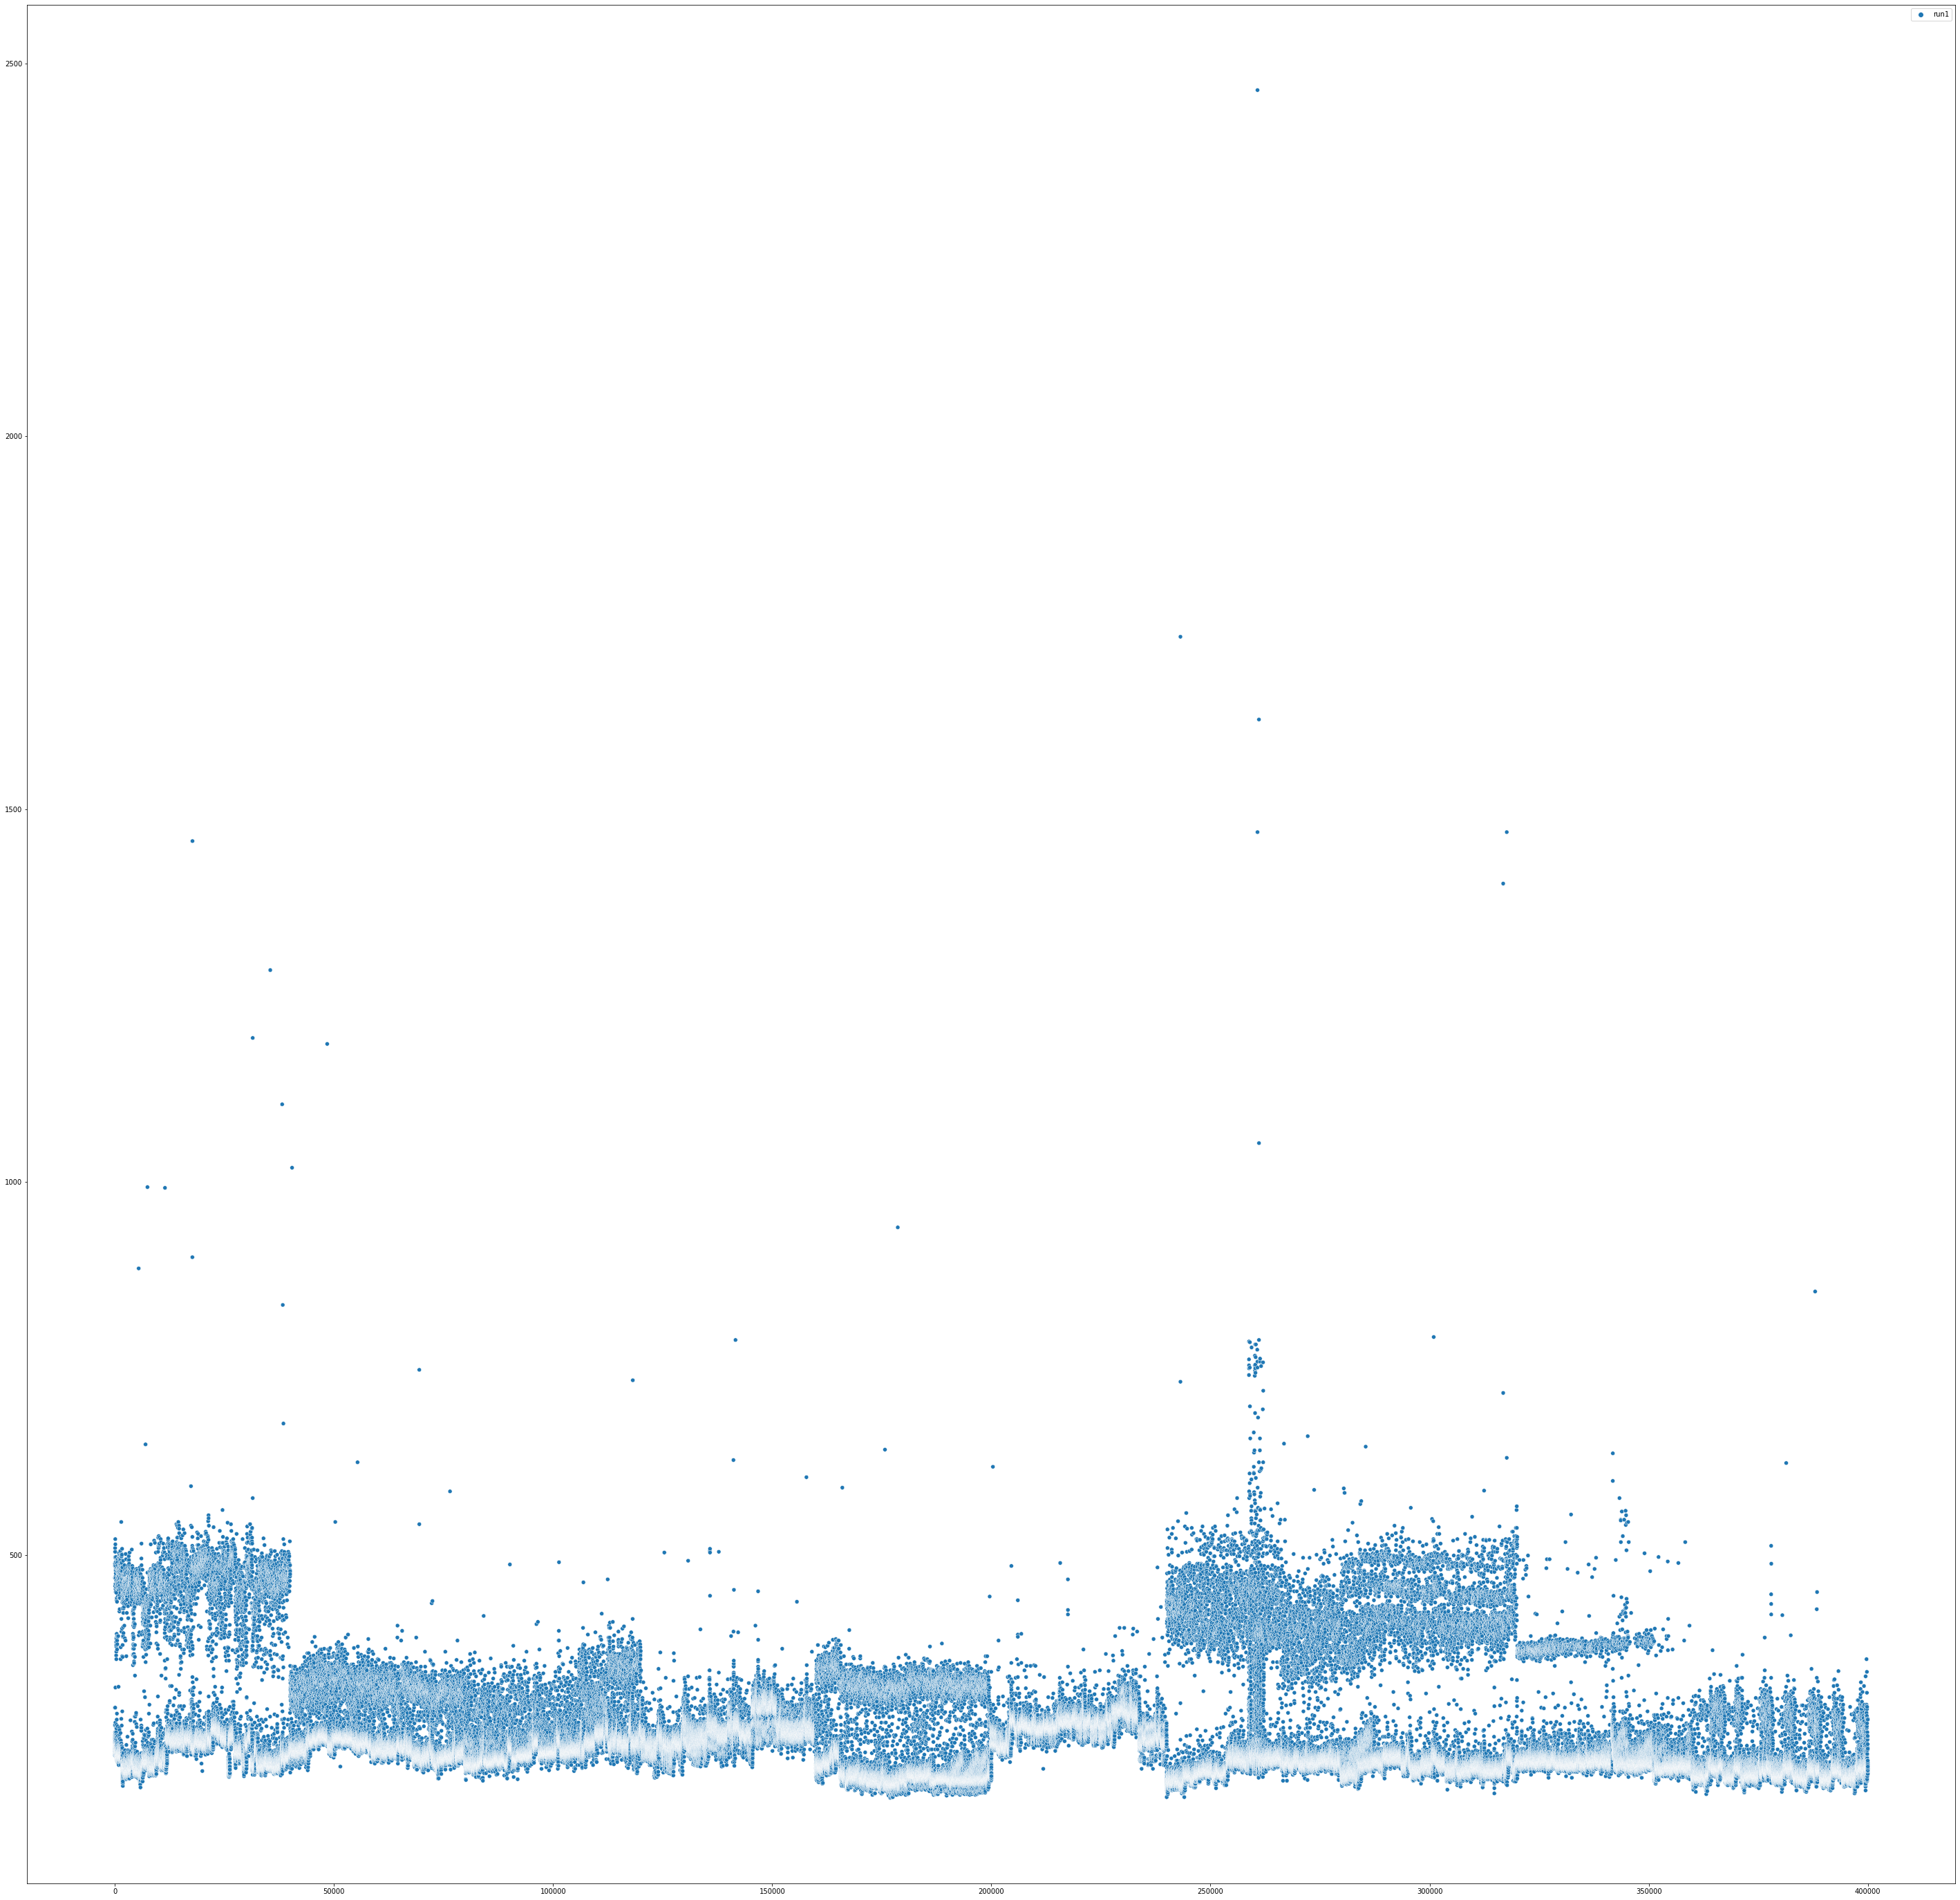

In [11]:
sns.scatterplot(data=df_latencies)

# Ping

<AxesSubplot:xlabel='metric', ylabel='value'>

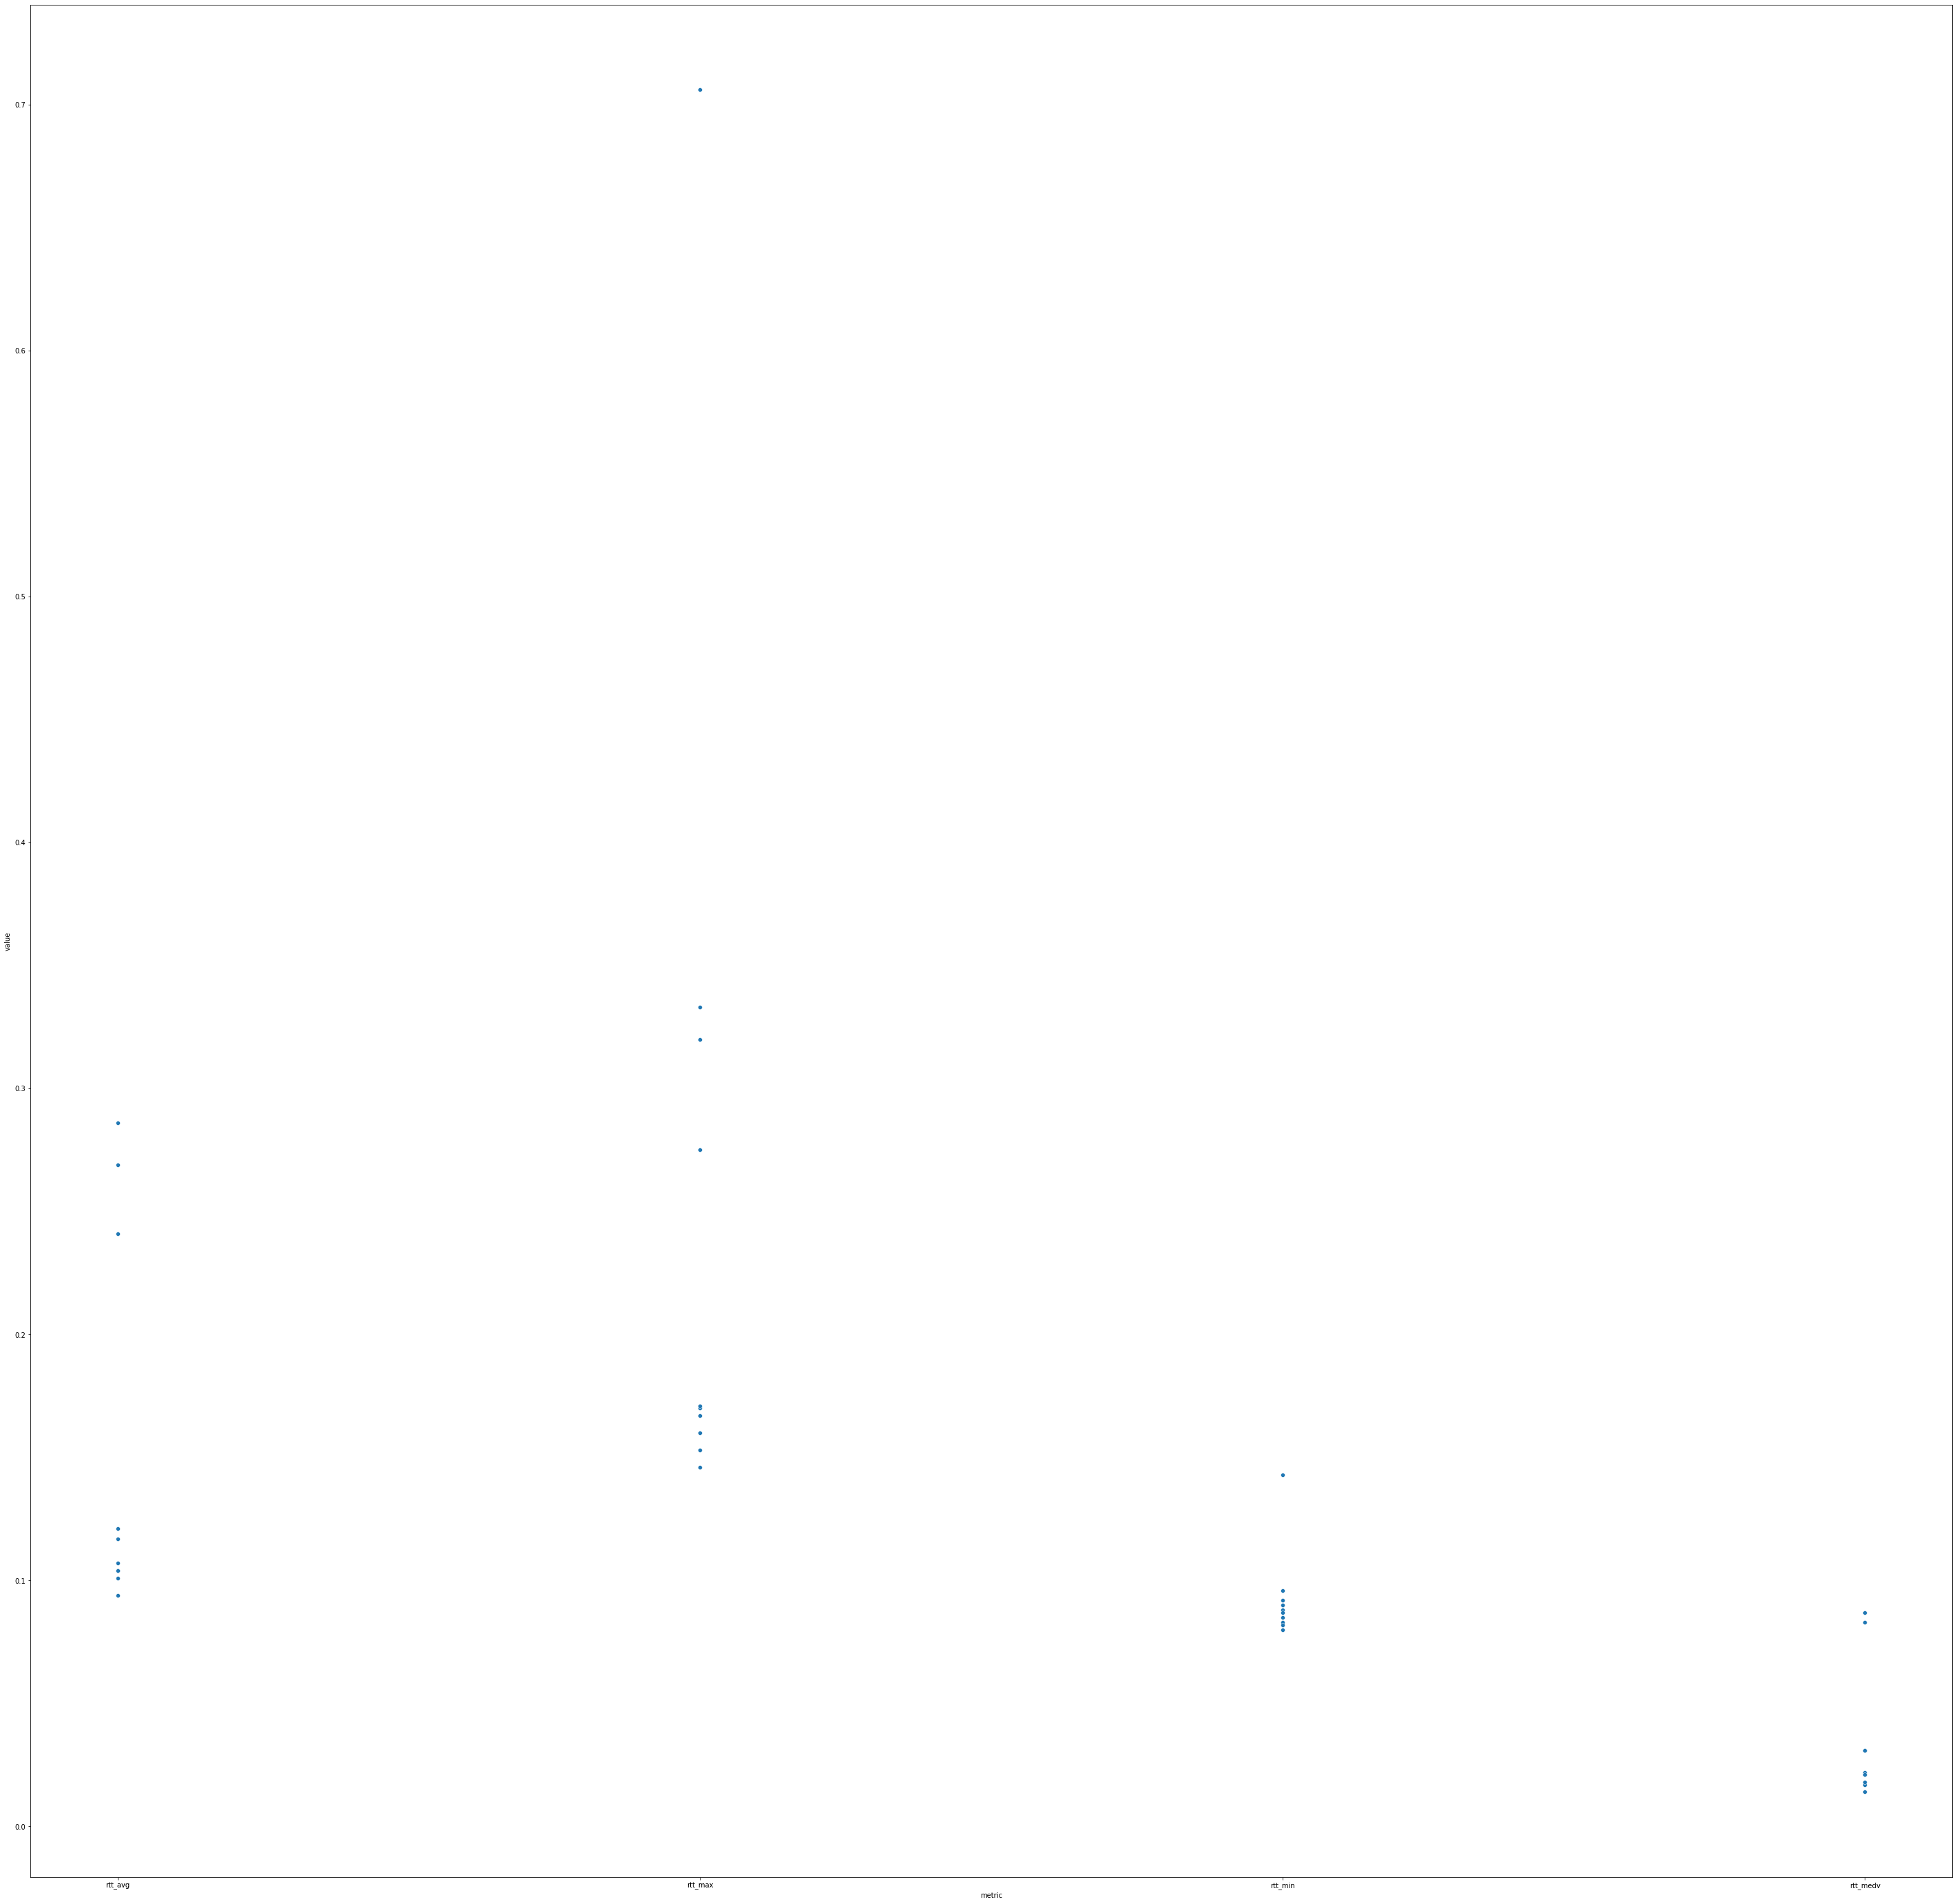

In [12]:
sns.scatterplot(data=df_ping, x="metric", y="value")